# **Experiment Notebook**



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

## A. Project


Project name = Bank Transaction Analysis

Type = EDA

<hr>

<hr>

## B. Data Understanding


This analysis examines banking transaction data from 2022, originally distributed across 60 CSV files categorised by age, gender and location. The consolidated dataset comprises 816,859 transactions from 886 unique accounts, with each transaction record containing 10 features including credit card number, account number, transaction number, timestamp, category, amount, fraud indicator, and merchant information with geographical coordinates. Analysis reveals significant demographic imbalances: urban transactions dominate with 788,507 transactions (96.5%), split between female (409,841 transactions) and male (378,666 transactions) customers, while rural transactions are notably underrepresented with only 28,352 transactions (3.5%). Several original datasets, particularly in the rural female segment, were empty, indicating potential data collection issues or genuine demographic patterns requiring further investigation. The transaction amount distribution is heavily right-skewed, with most transactions concentrated under 100 and particularly around 20-30, though the range extends to amounts as high as 25,000, indicating the presence of some high-value outlier transactions. The data quality is robust with no duplicate transactions, and no missing values in critical features, though the severe underrepresentation of rural transactions, particularly female rural transactions, should be carefully considered.

### B.0 Import Packages

In [2]:
 # Pandas for data handling
import pandas as pd

# Scikit Learn for ML training
import sklearn

# Altair for plotting
import altair as alt

#Loading dataset
from pathlib import Path
import re

# Numpy for data handling
import numpy as np

# Seaborn for plotting
import seaborn as sns

# Matplotlib for plotting
import matplotlib.pyplot as plt

# Datetime for date handling
from datetime import datetime

<hr>

### B.1   Load Dataset


In [3]:
#Load the dataset, combining the dataset to specific category and one whole dataset for comprehensive insight of the dataset
# Define a pattern for multiple delimiters
delimiter_pattern = r'[|,]'

#1: Adult female dataset
# Get all rural and urban CSV files separately
adult_female_rural_files = [file for file in Path('.').glob('adults_2550_female_rural*.csv')]
adult_female_urban_files = [file for file in Path('.').glob('adults_2550_female_urban*.csv')]
#Read and concatenate rural files into a single DataFrame
df_adult_female_rural = pd.concat([pd.read_csv(file, delimiter='|') for file in adult_female_rural_files], ignore_index=True)
#Read and concatenate urban files into a single DataFrame
df_adult_female_urban = pd.concat([pd.read_csv(file, delimiter='|') for file in adult_female_urban_files], ignore_index=True)

#2: Adult male dataset
# Get all rural and urban CSV files separately
adult_male_rural_files = [file for file in Path('.').glob('adults_2550_male_rural*.csv')]
adult_male_urban_files = [file for file in Path('.').glob('adults_2550_male_urban*.csv')]
#Read and concatenate rural files into a single DataFrame
df_adult_male_rural = pd.concat([pd.read_csv(file, delimiter='|') for file in adult_male_rural_files], ignore_index=True)
#Read and concatenate urban files into a single DataFrame
df_adult_male_urban = pd.concat([pd.read_csv(file, delimiter='|') for file in adult_male_urban_files], ignore_index=True)

#3: Young adult male dataset
# Get all rural and urban CSV files separately
young_adult_male_rural_files = [file for file in Path('.').glob('young_adults_male_rural*.csv')]
young_adult_male_urban_files = [file for file in Path('.').glob('young_adults_male_urban*.csv')]
#Read and concatenate rural files into a single DataFrame
df_young_adult_male_rural = pd.concat([pd.read_csv(file, delimiter='|') for file in young_adult_male_rural_files], ignore_index=True)
#Read and concatenate urban files into a single DataFrame
df_young_adult_male_urban = pd.concat([pd.read_csv(file, delimiter='|') for file in young_adult_male_urban_files], ignore_index=True)

#4: Young adult female dataset
# Get all rural and urban CSV files separately
young_adult_female_rural_files = [file for file in Path('.').glob('young_adults_female_rural*.csv')]
young_adult_female_urban_files = [file for file in Path('.').glob('young_adults_female_urban*.csv')]
#Read and concatenate rural files into a single DataFrame
df_young_adult_female_rural = pd.concat([pd.read_csv(file, delimiter='|') for file in young_adult_female_rural_files], ignore_index=True)
#Read and concatenate urban files into a single DataFrame
df_young_adult_female_urban = pd.concat([pd.read_csv(file, delimiter='|') for file in young_adult_female_urban_files], ignore_index=True)

#5: 50up (senior) female dataset
# Get all rural and urban CSV files separately
senior_female_rural_files = [file for file in Path('.').glob('adults_50up_female_rural*.csv')]
senior_female_urban_files = [file for file in Path('.').glob('adults_50up_female_urban*.csv')]
#Read and concatenate rural files into a single DataFrame
df_senior_female_rural = pd.concat([pd.read_csv(file, delimiter=delimiter_pattern) for file in senior_female_rural_files], ignore_index=True)
#Read and concatenate urban files into a single DataFrame
df_senior_female_urban = pd.concat([pd.read_csv(file, delimiter=delimiter_pattern) for file in senior_female_urban_files], ignore_index=True)

#5: 50up (senior) male dataset
# Get all rural and urban CSV files separately
senior_male_rural_files = [file for file in Path('.').glob('adults_50up_male_rural*.csv')]
senior_male_urban_files = [file for file in Path('.').glob('adults_50up_male_urban*.csv')]
#Read and concatenate rural files into a single DataFrame
df_senior_male_rural = pd.concat([pd.read_csv(file, delimiter=delimiter_pattern) for file in senior_male_rural_files], ignore_index=True)
#Read and concatenate urban files into a single DataFrame
df_senior_male_urban = pd.concat([pd.read_csv(file, delimiter=delimiter_pattern) for file in senior_male_urban_files], ignore_index=True)

<ipython-input-3-dc7802ed24ed>:46: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_senior_female_rural = pd.concat([pd.read_csv(file, delimiter=delimiter_pattern) for file in senior_female_rural_files], ignore_index=True)
<ipython-input-3-dc7802ed24ed>:46: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_senior_female_rural = pd.concat([pd.read_csv(file, delimiter=delimiter_pattern) for file in senior_female_rural_files], ignore_index=True)
<ipython-input-3-dc7802ed24ed>:46: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char 

In [4]:
print("Shape of adult_female_rural_files:", df_adult_female_rural.shape)
print("Shape of adult_female_urban_files:", df_adult_female_urban.shape)
print("Shape of adult_male_rural_files:", df_adult_male_rural.shape)
print("Shape of adult_male_urban_files:", df_adult_male_urban.shape)
print("Shape of young_adult_male_rural_files:", df_young_adult_male_rural.shape)
print("Shape of young_adult_male_urban_files:", df_young_adult_male_urban.shape)
print("Shape of young_adult_female_rural_files:", df_young_adult_female_rural.shape)
print("Shape of young_adult_female_urban_files:", df_young_adult_female_urban.shape)
print("Shape of senior_female_rural_files:", df_senior_female_rural.shape)
print("Shape of senior_female_urban_files:", df_senior_female_urban.shape)
print("Shape of senior_male_rural_files:", df_senior_male_rural.shape)
print("Shape of senior_male_urban_files:", df_senior_male_urban.shape)

Shape of adult_female_rural_files: (5019, 10)
Shape of adult_female_urban_files: (227457, 10)
Shape of adult_male_rural_files: (5737, 10)
Shape of adult_male_urban_files: (227140, 10)
Shape of young_adult_male_rural_files: (6448, 10)
Shape of young_adult_male_urban_files: (38761, 10)
Shape of young_adult_female_rural_files: (9, 10)
Shape of young_adult_female_urban_files: (45548, 10)
Shape of senior_female_rural_files: (8265, 10)
Shape of senior_female_urban_files: (136836, 10)
Shape of senior_male_rural_files: (2874, 10)
Shape of senior_male_urban_files: (112765, 10)


>Insights: Big differences in the population of the datasets.

In [5]:
# Add region, gender and age group to dataset

df_mapping = {
    'adult_female_rural': {'region': 'rural', 'gender': 'female', 'age_group': 'adult'},
    'adult_female_urban': {'region': 'urban', 'gender': 'female', 'age_group': 'adult'},
    'adult_male_rural': {'region': 'rural', 'gender': 'male', 'age_group': 'adult'},
    'adult_male_urban': {'region': 'urban', 'gender': 'male', 'age_group': 'adult'},
    'young_adult_male_rural': {'region': 'rural', 'gender': 'male', 'age_group': 'young_adult'},
    'young_adult_male_urban': {'region': 'urban', 'gender': 'male', 'age_group': 'young_adult'},
    'young_adult_female_rural': {'region': 'rural', 'gender': 'female', 'age_group': 'young_adult'},
    'young_adult_female_urban': {'region': 'urban', 'gender': 'female', 'age_group': 'young_adult'},
    'senior_female_rural': {'region': 'rural', 'gender': 'female', 'age_group': 'senior'},
    'senior_female_urban': {'region': 'urban', 'gender': 'female', 'age_group': 'senior'},
    'senior_male_rural': {'region': 'rural', 'gender': 'male', 'age_group': 'senior'},
    'senior_male_urban': {'region': 'urban', 'gender': 'male', 'age_group': 'senior'}
}

# Apply features to each dataframe
for df_name, features in df_mapping.items():
    df = eval(f'df_{df_name}')  # Get the dataframe object
    for feature, value in features.items():
        df[feature] = value

In [6]:
# Combined everything into one whole dataset

df_combined = pd.concat([df_adult_female_rural, df_adult_female_urban, df_adult_male_rural, df_adult_male_urban, df_young_adult_male_rural, df_young_adult_male_urban, df_young_adult_female_rural, df_young_adult_female_urban, df_senior_female_rural, df_senior_female_urban, df_senior_male_rural, df_senior_male_urban], ignore_index=True)

In [7]:
# The dimension of the combined dataset

print("Shape of df_combined:", df_combined.shape)

Shape of df_combined: (816859, 13)


<hr>

### B.2 Explore Dataset

In [8]:
df_combined

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,region,gender,age_group
0,6584732365337749,843643900137,1c3d17397d7149e2a955b4b2423b0748,1645882376,shopping_pos,9.38,1,Huffman-Washington,44.251847,-91.168351,rural,female,adult
1,6584732365337749,843643900137,c62ca420fef5ea197b496f861af29cd9,1645888457,gas_transport,1119.10,1,Morrison-Brown,44.433155,-92.259518,rural,female,adult
2,6584732365337749,843643900137,54bcc5a58d8bf272c64be31f2420e87e,1646050072,home,573.21,1,"Pierce, Gardner and Rich",42.990796,-91.185804,rural,female,adult
3,6584732365337749,843643900137,d660da6115de2a5b4621f5e64af9087f,1646052298,personal_care,553.55,1,"Farley, Herrera and Phillips",43.232627,-91.020145,rural,female,adult
4,6584732365337749,843643900137,e5901413138fc03a46fb79ddad1c7122,1646047130,travel,23.62,1,Smith-Aguilar,44.340716,-90.968698,rural,female,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816854,343252000000000.0,298027000000.0,2a1e7680d91e51a60716064068577268,1670908006,personal_care,2.94,0,Monroe Ltd,28.019383,-81.794612,urban,male,senior
816855,343252000000000.0,298027000000.0,09267380cfb24c33c7048fc9e9f87a6f,1669943329,kids_pets,6.43,0,Jimenez Group,27.065622,-82.343797,urban,male,senior
816856,343252000000000.0,298027000000.0,1f70991b54083954b077b5711ebbfa0a,1665710553,home,6.41,0,Coleman-Fry,28.505515,-82.288554,urban,male,senior
816857,343252000000000.0,298027000000.0,096f2c10cf3589b727d39bf1a3e36916,1670748794,personal_care,1252.96,0,Snow,NaN,NaN,urban,male,senior


In [9]:
# Describe combined dataframe

df_combined.describe()


,amt,merch_lat,merch_long
count,816859.000000,729820.000000,729820.000000
mean,69.848226,37.335625,-93.445830
std,171.228870,5.727537,18.148311
min,1.000000,18.590006,-160.365535
25%,9.080000,33.602882,-104.246858
50%,44.370000,37.914833,-88.086464
75%,81.520000,41.184684,-79.983610
max,25159.920000,65.773846,-67.248144


> Insights: Amount ranges from 1 to 25.160, but the 75 percentile is 81,52, indicating outliers in the upper region.

In [10]:
# Describe information of combined dataframe

df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816859 entries, 0 to 816858
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      816859 non-null  object 
 1   acct_num    816859 non-null  object 
 2   trans_num   816859 non-null  object 
 3   unix_time   816859 non-null  object 
 4   category    816859 non-null  object 
 5   amt         816859 non-null  float64
 6   is_fraud    816859 non-null  object 
 7   merchant    816859 non-null  object 
 8   merch_lat   729820 non-null  float64
 9   merch_long  729820 non-null  float64
 10  region      816859 non-null  object 
 11  gender      816859 non-null  object 
 12  age_group   816859 non-null  object 
dtypes: float64(3), object(10)
memory usage: 81.0+ MB


> Insights:  In total, there are 816.859 rows with some missing values in merch_lat and merch_long. Handling of missing values will only be done if the features are going to be used.

In [11]:
# Count by region
print("Count by region:")
print(df_combined['region'].value_counts())

# Count by gender
print("\nCount by gender:")
print(df_combined['gender'].value_counts())

Count by region:
region
urban    788507
rural     28352
Name: count, dtype: int64

Count by gender:
gender
female    423134
male      393725
Name: count, dtype: int64


In [12]:
print("\nCross-tabulation of region and gender:")
print(pd.crosstab(df_combined['region'], df_combined['gender']))


Cross-tabulation of region and gender:
gender  female    male
region                
rural    13293   15059
urban   409841  378666


In [13]:
# For percentages of the total (all cells sum to 100%)
print("\nCross-tabulation of region and gender (% of total):")
print(pd.crosstab(df_combined['region'], df_combined['gender'], normalize='all') * 100)

# For row percentages (each row sums to 100%)
print("\nCross-tabulation of region and gender (% by row):")
print(pd.crosstab(df_combined['region'], df_combined['gender'], normalize='index') * 100)

# For column percentages (each column sums to 100%)
print("\nCross-tabulation of region and gender (% by column):")
print(pd.crosstab(df_combined['region'], df_combined['gender'], normalize='columns') * 100)


Cross-tabulation of region and gender (% of total):
gender     female       male
region                      
rural    1.627331   1.843525
urban   50.172796  46.356348

Cross-tabulation of region and gender (% by row):
gender     female       male
region                      
rural   46.885581  53.114419
urban   51.976837  48.023163

Cross-tabulation of region and gender (% by column):
gender     female       male
region                      
rural    3.141558   3.824751
urban   96.858442  96.175249


> Insights: There is a predominantly urban population distribution, with approximately 96% of individuals residing in urban areas compared to only 4% in rural areas. The severe underrepresentation of rural transactions raises concerns about data collection completeness or potential systematic exclusion. Some of the original CSV files, especially in the rural female category, were empty, suggesting possible data collection or processing errors. The contrast between urban and rural representation extends beyond normal demographic variations, indicating potential sampling bias. These issues significantly limit the dataset's ability to provide insights about rural banking patterns and gender-based differences in rural areas.

In [14]:
# Percentage by age
print("Count by age group:")
print(df_combined['age_group'].value_counts(normalize=True) * 100)

Count by age group:
age_group
adult          56.968583
senior         31.919829
young_adult    11.111587
Name: proportion, dtype: float64


> Insights: Adult is the largest age group, accounting for 57% of the dataset, followed by senior at 32%. Young adult is only 11%

In [15]:
# check for duplicates by transaction number

df_combined['trans_num'].nunique()

816859

> Insights: No duplicates based on transaction numbers.

In [16]:
# Find number of unique accounts

print('df_combined acct_num:',df_combined['acct_num'].nunique())

df_combined acct_num: 886


> Insights: The 816.859 transactions are from 886 different accounts.

In [17]:
# Find unique categories

df_combined['category'].unique()


array(['shopping_pos', 'gas_transport', 'home', 'personal_care', 'travel',
       'kids_pets', 'entertainment', 'health_fitness', 'grocery_pos',
       'misc_net', 'grocery_net', 'misc_pos', 'shopping_net',
       'food_dining'], dtype=object)

> Insights: There are 14 different categories.

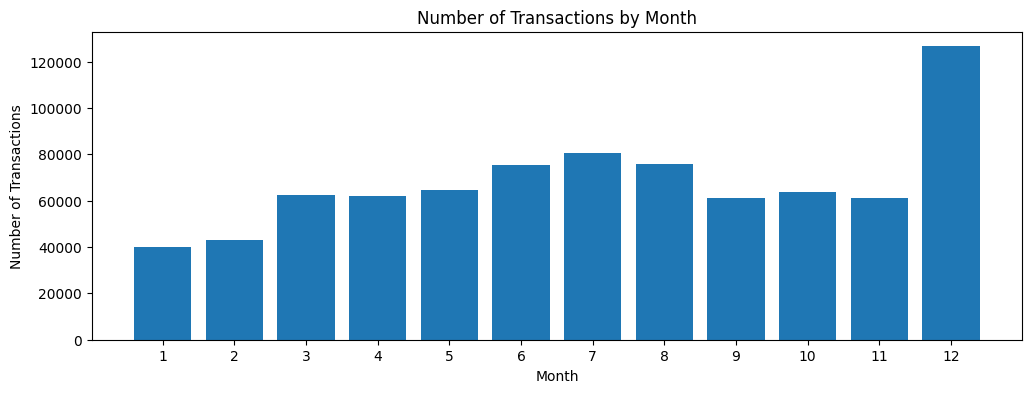

In [18]:
# Convert unix timestamp to datetime
df_combined['unix_time'] = pd.to_numeric(df_combined['unix_time'])
df_combined['trans_date_time'] = pd.to_datetime(df_combined['unix_time'], unit='s')

# Plot monthly transaction counts
monthly_counts = df_combined['trans_date_time'].dt.month.value_counts().sort_index()
plt.figure(figsize=(12, 4))
plt.bar(range(1, 13), monthly_counts)
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 13))
plt.show()

In [19]:
# Check Datetime column

df_combined['trans_date_time']

,trans_date_time
0,2022-02-26 13:32:56
1,2022-02-26 15:14:17
2,2022-02-28 12:07:52
3,2022-02-28 12:44:58
4,2022-02-28 11:18:50
...,...
816854,2022-12-13 05:06:46
816855,2022-12-02 01:08:49
816856,2022-10-14 01:22:33
816857,2022-12-11 08:53:14


> Insights: The transactions are from 2022, with an uptick in December 2022. The timestamp includes date and time.

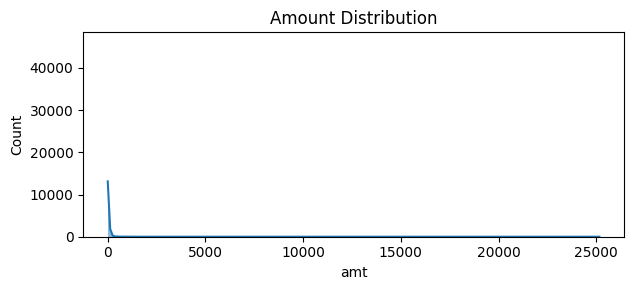

In [20]:
# Plot Amount distribution

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.histplot(df_combined['amt'], kde=True)
plt.title('Amount Distribution')


plt.tight_layout()
plt.show()


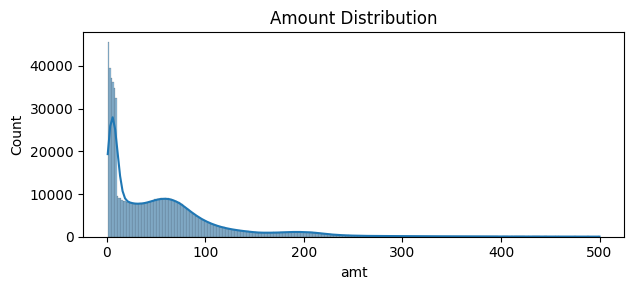

In [21]:
# Plot Amount distribution under 500

df_filtered = df_combined[df_combined['amt'] < 500]

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.histplot(df_filtered['amt'], kde=True)
plt.title('Amount Distribution')


plt.tight_layout()
plt.show()

> Insights: The majority of transactions are under 100, with some outliers up to 25.000

> Considerations: The wide range of transaction amounts (from small everyday purchases to outliers of $25,000) suggests that separate analyses for different transaction value ranges might be more informative

> Issues found: Missing values in merch_lat and merch_long - will be dealt with if necessary. Small rural population - region should not be used as a feature due to the imbalance.

<hr>

<hr>

### B.3 Explore Variables of Interest

<hr>

#### B.3.a Feature "Datetime"

In [22]:
# Describe datetime

df_combined['trans_date_time'].describe()


,trans_date_time
count,816859
mean,2022-07-23 10:28:19.438835968
min,2022-01-06 13:00:34
25%,2022-04-29 21:58:08.500000
50%,2022-07-24 06:11:35
75%,2022-10-23 09:21:22.500000
max,2022-12-31 12:59:42


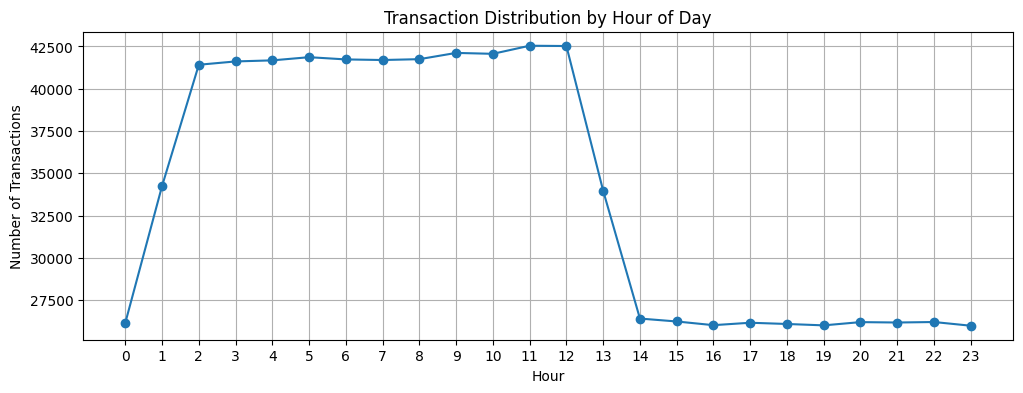

In [23]:
# Plot daily pattern by hour

hourly_counts = df_combined['trans_date_time'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(12, 4))
plt.plot(range(24), hourly_counts, marker='o')
plt.title('Transaction Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.grid(True)
plt.show()


> Insights: The hourly distribution shows a clear pattern where transaction activity increases around 2 am and maintains steady at around 42,000 transactions per hour during the day until noon , after which it drops significantly to a consistent lower level (around 26,000 transactions per hour) during evening and early night hours.

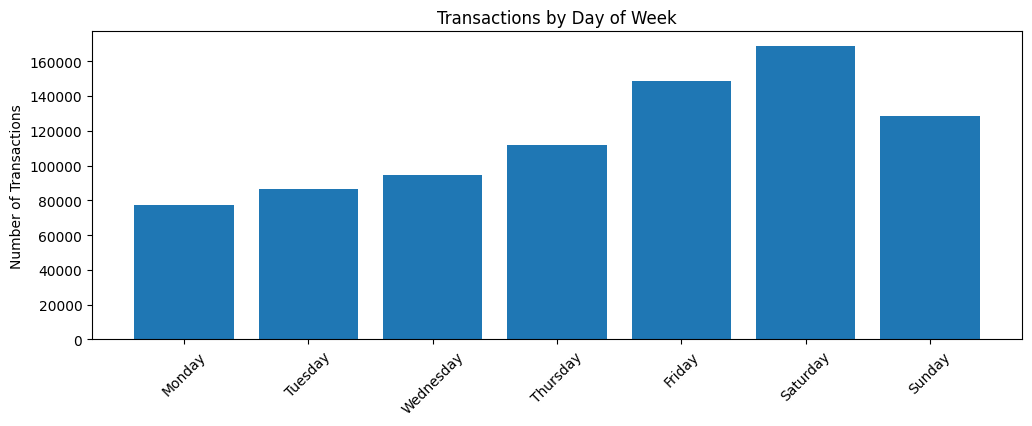

In [24]:
# Day of week analysis

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df_combined['trans_date_time'].dt.day_name().value_counts()
daily_counts = daily_counts.reindex(day_order)

plt.figure(figsize=(12, 4))
plt.bar(day_order, daily_counts)
plt.title('Transactions by Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Number of Transactions')
plt.show()


In [25]:
# Basic statistics
print("\nTransaction Timing Statistics:")
print("\nTransactions by Day of Week:")
print(daily_counts)

print("\nBusiest Hours:")
print(hourly_counts.nlargest(5))

print("\nTransaction Distribution:")
print(f"First Transaction: {df_combined['trans_date_time'].min()}")
print(f"Last Transaction: {df_combined['trans_date_time'].max()}")
print(f"Total Days: {(df_combined['trans_date_time'].max() - df_combined['trans_date_time'].min()).days}")



Transaction Timing Statistics:

Transactions by Day of Week:
trans_date_time
Monday        77274
Tuesday       86772
Wednesday     94872
Thursday     111879
Friday       148563
Saturday     168763
Sunday       128736
Name: count, dtype: int64

Busiest Hours:
trans_date_time
11    42542
12    42524
9     42117
10    42063
5     41864
Name: count, dtype: int64

Transaction Distribution:
First Transaction: 2022-01-06 13:00:34
Last Transaction: 2022-12-31 12:59:42
Total Days: 358


> Insights: The daily distribution reveals that transaction volume gradually increases throughout the work week, with Saturday being the busiest day (approximately 169,000 transactions), followed by Friday (about 146,000 transactions), while early weekdays (Monday-Wednesday) show lower activity with only 7,000-10,000 transactions each.

> Considerations: The contrast between daytime and nighttime transaction volumes, along with the significant weekend surge, suggests that analyses should be segmented by time periods to avoid masking important patterns - what appears "normal" during peak Saturday hours would be highly unusual during a Monday night. The sharp increase at 2 am in daily transactions requires further investigation as this is an unusual timing for high transaction volumes.

> Issues found: The dataset is missing the first five days of January 2022, which could affect monthly comparisons, and the abrupt spike in transactions at 2am daily appears unusual and may indicate either a batch processing system, a timezone conversion issue, or potential data collection anomalies that need to be investigated before drawing conclusions about early morning transaction patterns.

#### B.3.b Feature "Amount"

Text(0, 0.5, 'Count')

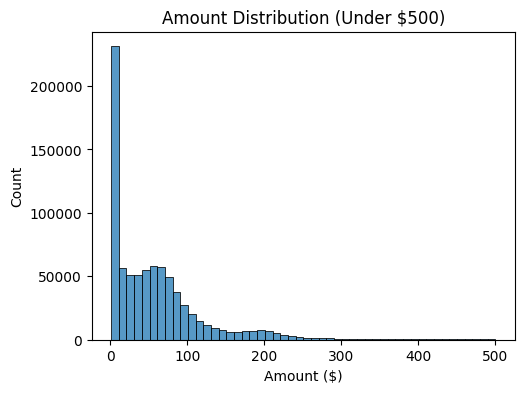

In [26]:
# Basic amount distribution with common transaction ranges

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

# Focus on transactions under 500
sns.histplot(data=df_combined[df_combined['amt'] < 500], x='amt', bins=50)
plt.title('Amount Distribution (Under $500)')
plt.xlabel('Amount ($)')
plt.ylabel('Count')



> Insights: The amount distribution under 500 shows a dramatic skewed pattern with the highest concentration of transactions occurring at very low amounts (under 50), and a sharp peak in the first bin, suggesting that small-value transactions dominate the dataset.

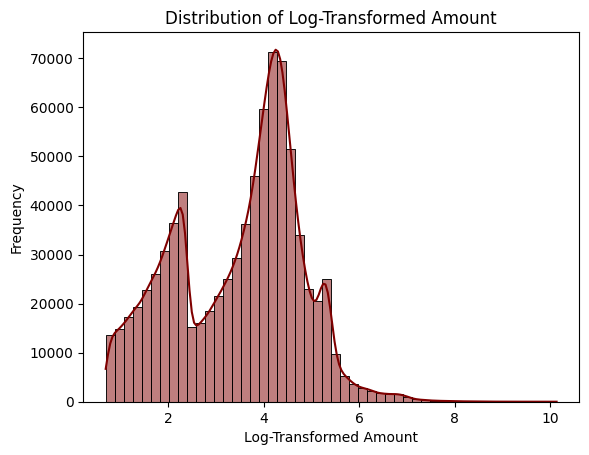

In [27]:
#Display the distribution of transaction amount
# Apply log transformation to 'amt' in combined_df
df_combined['amt_log'] = np.log1p(df_combined['amt'])

# Plot the histogram for the log-transformed 'amt'
sns.histplot(df_combined['amt_log'], bins=50, kde=True, color='maroon')
plt.title("Distribution of Log-Transformed Amount")
plt.xlabel("Log-Transformed Amount")
plt.ylabel("Frequency")
plt.show()

> Insights: The distribution reveals several peaks, suggesting the possibility of different transaction groups. By applying clustering, we may be able to identify behavior patterns for each group. The distribution even after log-transformed and it's right-skewed due to the outliers on the higher end.

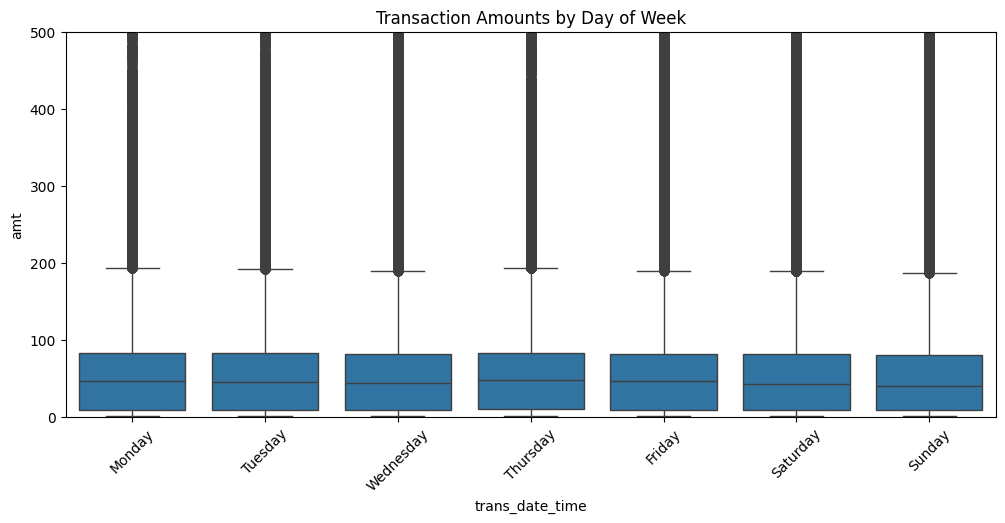

In [28]:
# Amount patterns by day of week with box plots

plt.figure(figsize=(12, 5))
sns.boxplot(data=df_combined, x=df_combined['trans_date_time'].dt.day_name(),
            y='amt', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                           'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Amounts by Day of Week')
plt.xticks(rotation=45)
plt.ylim(0, 500)  # Limit y-axis to focus on main distribution
plt.show()



> Insights: The box plots across days of the week reveal consistent median transaction amounts across all days, with numerous outliers reaching up to 500. The distribution pattern remains relatively stable regardless of the day, indicating that transaction amounts are more influenced by type of purchase than day of week.

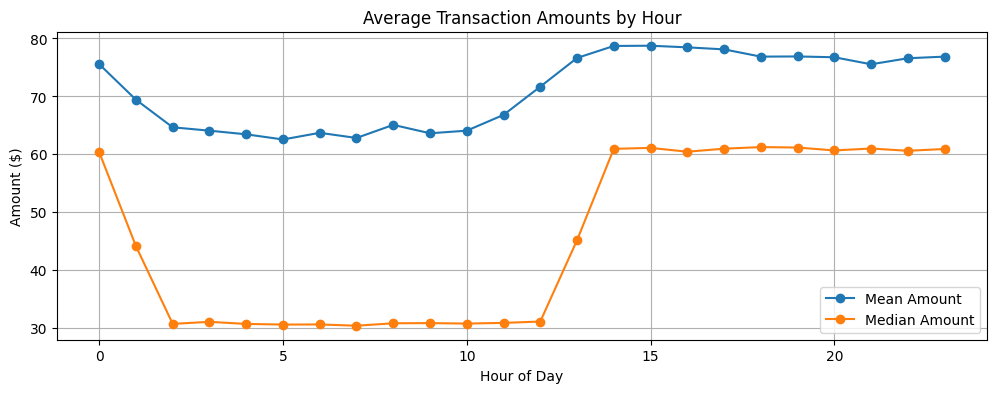


Hourly Transaction Amount Summary:
                  mean  median  count
trans_date_time                      
0                75.56   60.39  26155
1                69.43   44.18  34245
2                64.67   30.77  41417
3                64.09   31.12  41613
4                63.46   30.76  41676
5                62.57   30.65  41864
6                63.72   30.67  41732
7                62.83   30.45  41697
8                65.09   30.87  41747
9                63.64   30.90  42117
10               64.09   30.82  42063
11               66.81   30.94  42542
12               71.68   31.17  42524
13               76.63   45.20  33967
14               78.70   60.96  26411
15               78.74   61.12  26238
16               78.46   60.46  26020
17               78.11   60.98  26163
18               76.86   61.26  26090
19               76.89   61.18  26008
20               76.75   60.68  26200
21               75.54   61.01  26177
22               76.58   60.62  26206
23            

In [29]:
# Hourly average transaction amounts

hourly_avg = df_combined.groupby(df_combined['trans_date_time'].dt.hour)['amt'].agg(['mean', 'median', 'count'])
hourly_avg = hourly_avg.round(2)

plt.figure(figsize=(12, 4))
plt.plot(hourly_avg.index, hourly_avg['mean'], marker='o', label='Mean Amount')
plt.plot(hourly_avg.index, hourly_avg['median'], marker='o', label='Median Amount')
plt.title('Average Transaction Amounts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

print("\nHourly Transaction Amount Summary:")
print(hourly_avg)



> Insights: The hourly average transaction amounts show a pattern where the mean remains relatively stable (around 60-80), but the median amount shows a dramatic shift at 2pm, jumping from about 30 to 60, suggesting a change in the type of transactions that occur in the afternoon versus morning hours.

> Considerations: The large difference between mean and median values in morning hours suggests different types of transactions are occurring at different times of day. While the day of week patterns show consistent medians, the extensive outliers need separate analysis and the extreme concentration of small-value transactions means that analyses might need to be stratified by amount ranges to avoid having patterns of larger transactions completely masked by the small-value transactions.

> Issues found: The difference between morning and afternoon median values (going from 30 to 60 at 2pm) appears unusual and may indicate systematic patterns in transaction processing or potential data recording issues. Also, the extremely right-skewed distribution makes it difficult to visualize and analyze patterns in larger transactions without separate treatment.

#### B.3.c Feature "is_fraud"

In [30]:
# Check if there are any missing values in the fraud column
missing_fraud = df_combined['is_fraud'].isnull().sum()
print(f"Missing values in 'fraud': {missing_fraud}")

# Check the unique values in fraud to ensure no unexpected values
unique_fraud = df_combined['is_fraud'].unique()
print(f"Unique values in 'fraud': {unique_fraud}")

Missing values in 'fraud': 0
Unique values in 'fraud': [1 0]


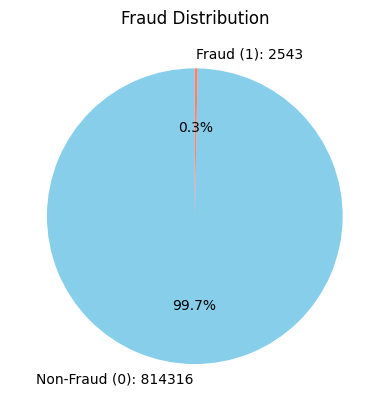

In [31]:
#count the values for each response in the is_fraud column
fraud_counts = df_combined['is_fraud'].value_counts()

#Define the labels for the pie chart
labels = [f'Non-Fraud (0): {fraud_counts[0]}', f'Fraud (1): {fraud_counts[1]}']

# Define custom colors (e.g., blue for Non-Fraud, red for Fraud)
colors = ['skyblue', 'salmon']

# Create the pie chart with custom colors
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Fraud Distribution')

# Display the pie chart
plt.show()


> Insights: Very imbalanced dataset when it comes to the 'is_fraud' variable.

> Considerations: The imbalanced dataset needs to be addressed if used. Can use SMOTE to mitigate this issue.

<hr>

## C. Data Cleaning


The data cleaning process addressed key formatting inconsistencies in the dataset. Credit card numbers (cc_num) and account numbers (acct_num) were converted to string format to prevent unintended numerical interpretations, while the fraud indicator (is_fraud) was properly formatted as an integer type. The dataset contains no duplicate records, ensuring data integrity. While missing values were identified in merchant latitude (merch_lat) and longitude (merch_long) coordinates, these were left as-is since they are not critical for current analysis. These geographic data points can be addressed in future iterations if spatial analysis becomes necessary.

### C.1 Fixing "Inconsistent Formatting"

> Although cc_num and acct_num consist of numbers, they don’t hold any inherent numerical value or meaning. Converting them to object (string) format rather than int or float is preferable, as this prevents the model from interpreting them as continuous numerical features, which could lead to unintended biases or errors.

In [32]:
#convert specified columns to object (string) type
df_combined['cc_num'] = df_combined['cc_num'].astype(str)
df_combined['acct_num'] = df_combined['acct_num'].astype(str)
#Check the result
print(df_combined['cc_num'].dtypes)
print(df_combined['acct_num'].dtypes)

object
object


### C.2 Fixing "Incorrect Formatting"

> 'is_fraud' has incorrect formatting

In [33]:
# Convert 'is_fraud' column to integer type
df_combined['is_fraud'] = df_combined['is_fraud'].astype(int)

#Check the result
print(df_combined['is_fraud'].dtypes)

int64


<hr>

## D. Feature Engineering

> Age group, gender, region and trans_date_time were added as features in section B1. Any other feature engineering will be done in the experiments of necessary.


<hr>

## E. Save Datasets

In [34]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816859 entries, 0 to 816858
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   cc_num           816859 non-null  object        
 1   acct_num         816859 non-null  object        
 2   trans_num        816859 non-null  object        
 3   unix_time        816859 non-null  int64         
 4   category         816859 non-null  object        
 5   amt              816859 non-null  float64       
 6   is_fraud         816859 non-null  int64         
 7   merchant         816859 non-null  object        
 8   merch_lat        729820 non-null  float64       
 9   merch_long       729820 non-null  float64       
 10  region           816859 non-null  object        
 11  gender           816859 non-null  object        
 12  age_group        816859 non-null  object        
 13  trans_date_time  816859 non-null  datetime64[ns]
 14  amt_log          816

In [35]:
# Save combined dataset as csv

df_combined.to_csv('Full-dataset.csv', index= False)

<hr>

<hr>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eb16e48c-aaed-445d-b13a-fcef2a72358e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>